In [38]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [121]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [127]:
testing=pd.read_csv('testing python.csv')
training=pd.read_csv('training data1.csv')

In [128]:
print(training.head())

   LIMIT_BAL  Sex  Education  AGE  difference  default
0   300000.0    1          2   39      192138        1
1   310000.0    0          4   39      -47682        1
2   340000.0    1          3   33        -235        1
3    80000.0    1          3   34      301791        1
4    70000.0    1          3   25      202734        1


In [129]:
training.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 6 columns):
LIMIT_BAL     24000 non-null float64
Sex           24000 non-null int64
Education     24000 non-null int64
AGE           24000 non-null int64
difference    24000 non-null int64
default       24000 non-null int64
dtypes: float64(1), int64(5)
memory usage: 1.1 MB


In [130]:
training.describe()

,LIMIT_BAL,Sex,Education,AGE,difference,default
count,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000
mean,167281.403333,0.604208,3.160208,35.499292,1.912069e+05,0.335625
std,130107.460154,0.489030,0.743627,9.229954,2.950079e+05,0.472218
min,10000.000000,0.000000,1.000000,21.000000,-2.666322e+06,0.000000
25%,50000.000000,0.000000,3.000000,28.000000,3.900000e+02,0.000000
50%,140000.000000,1.000000,3.000000,34.000000,8.176800e+04,0.000000
75%,240000.000000,1.000000,4.000000,41.000000,2.437050e+05,1.000000
max,1000000.000000,1.000000,4.000000,75.000000,3.201825e+06,1.000000


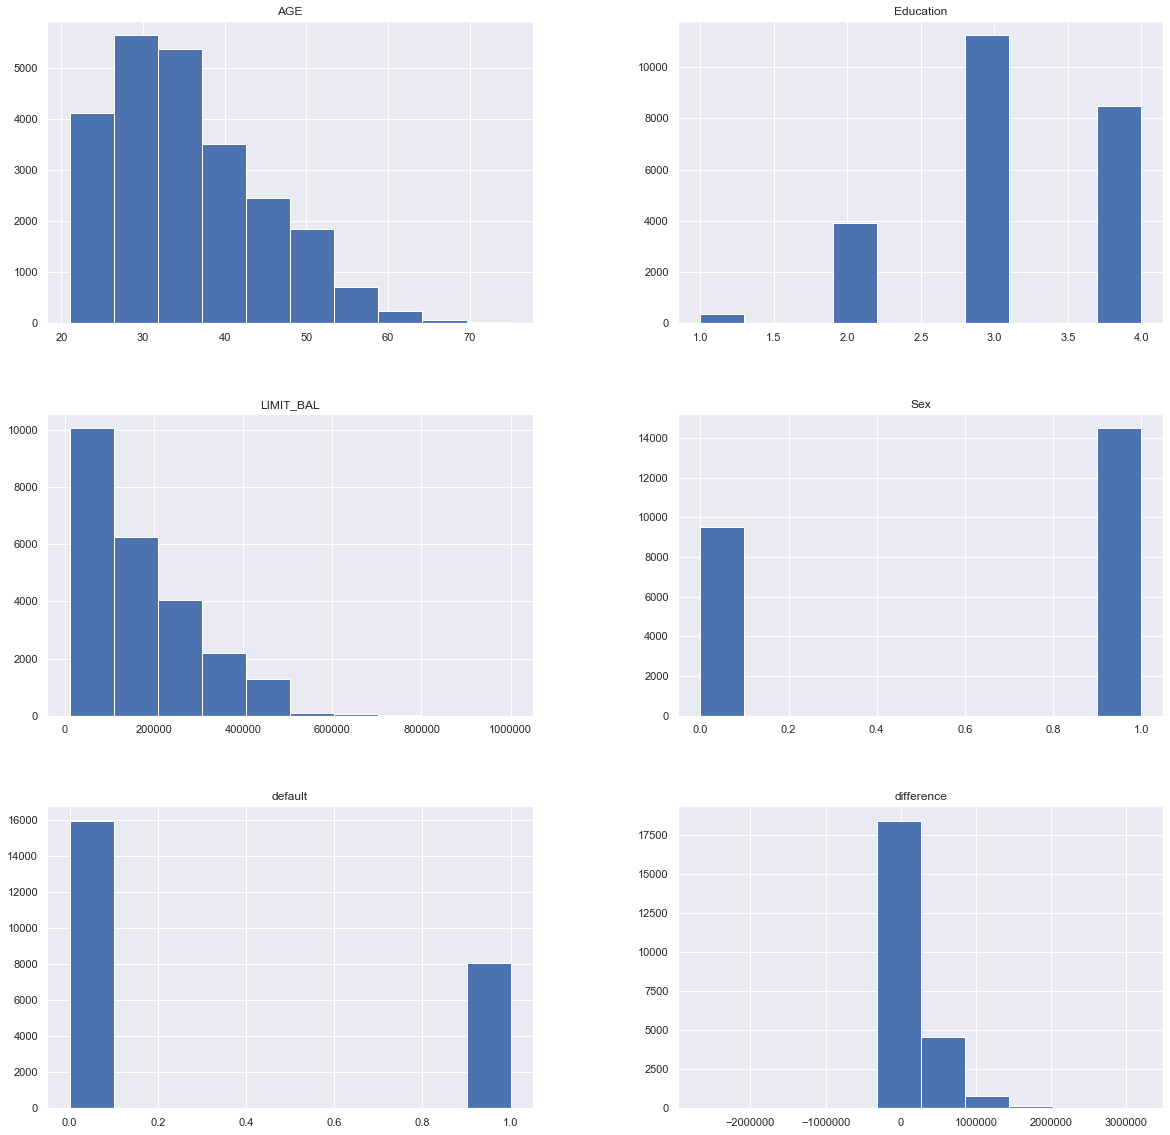

In [131]:
p = training.hist(figsize = (20,20))

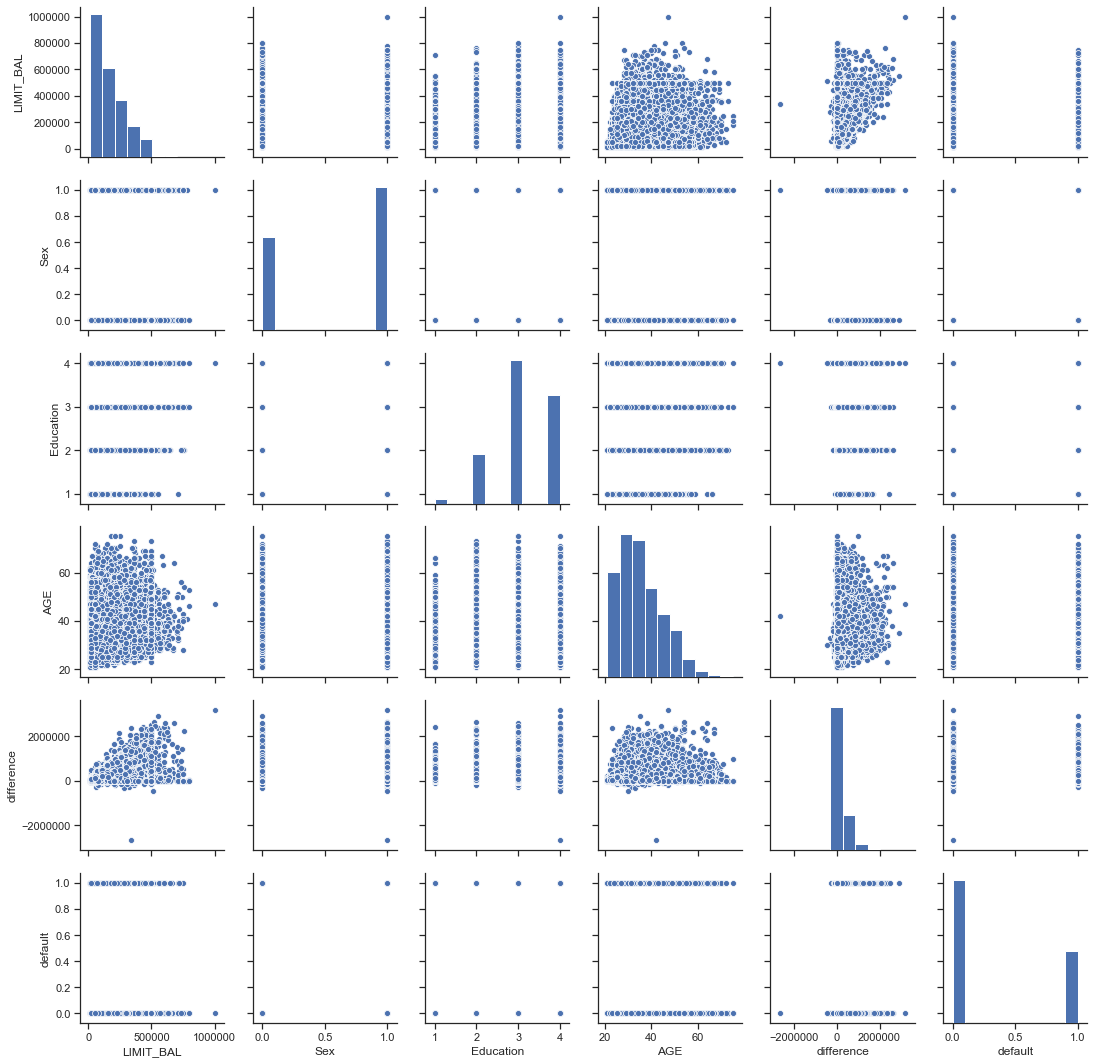

In [132]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
p=sns.pairplot(training)

In [133]:
corr = training.corr(method='pearson')
corr1 = training.corr(method='kendall')
corr2 = training.corr(method='spearman')

In [134]:
corr

,LIMIT_BAL,Sex,Education,AGE,difference,default
LIMIT_BAL,1.000000,0.021669,0.232325,0.146690,0.257368,-0.211489
Sex,0.021669,1.000000,-0.016291,-0.092419,-0.026395,-0.025965
Education,0.232325,-0.016291,1.000000,-0.182040,-0.011413,-0.034587
AGE,0.146690,-0.092419,-0.182040,1.000000,0.047391,-0.017445
difference,0.257368,-0.026395,-0.011413,0.047391,1.000000,-0.027538
default,-0.211489,-0.025965,-0.034587,-0.017445,-0.027538,1.000000


Method (from left to right: )
1.spearman 2.kendall 3.pearson 


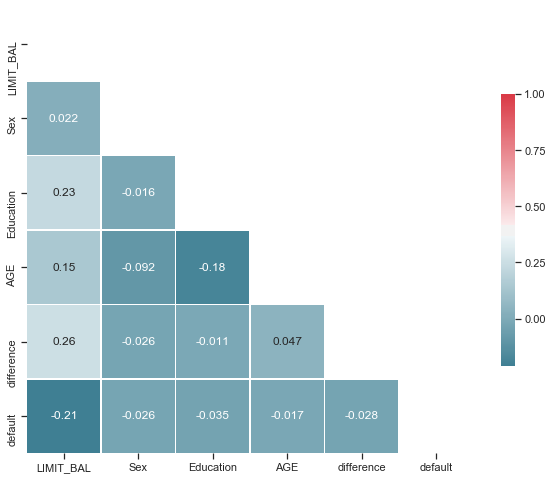

In [135]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr1, vmax=.3, center=0,
 #           square=True, linewidths=.5, cbar_kws={"shrink": .5})
print("Method (from left to right: )")
print("1.spearman 2.kendall 3.pearson ")
sns.heatmap(corr, cbar_kws={"shrink": .5}, linewidths=.5, mask=mask, cmap=cmap, square=True, annot=True)


## Scaling the data

In [136]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(training.drop(["default"],axis = 1),),
        columns=['LIMIT_BAL', 'Sex', 'Education', 'AGE',
       'Difference'])

In [137]:
X.head()

,LIMIT_BAL,Sex,Education,AGE,Difference
0,1.020090,0.809357,-1.560234,0.379285,0.003156
1,1.096951,-1.235549,1.129342,0.379285,-0.809788
2,1.327535,0.809357,-0.215446,-0.270786,-0.648952
3,-0.670855,0.809357,-0.215446,-0.162441,0.374859
4,-0.747716,0.809357,-0.215446,-1.137547,0.039075


In [138]:
y = training.default

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [140]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,16):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [141]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = min(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Min train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Min train score 70.19375 % and k = [15]


In [142]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 66.9 % and k = [10]


In [143]:
[train_scores[i]-test_scores[i] for i in range(len(test_scores))]

[0.38312500000000005,
 0.13587500000000008,
 0.16656249999999995,
 0.09493750000000001,
 0.11231249999999993,
 0.06537500000000007,
 0.07943750000000005,
 0.05756250000000007,
 0.05993749999999998,
 0.04556249999999995,
 0.05112500000000009,
 0.03974999999999995,
 0.040312500000000084,
 0.03399999999999992,
 0.034812500000000024]

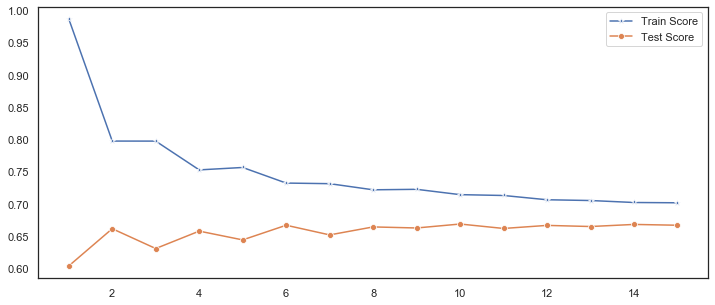

In [144]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,16),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,16),test_scores,marker='o',label='Test Score')

In [145]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(15)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.667125

IndexError: index 5 is out of bounds for axis 0 with size 5

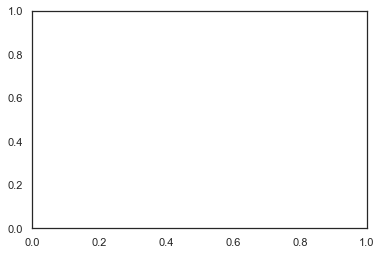

In [146]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [ ]:
knn

In [147]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,4672,643,5315
1,2020,665,2685
All,6692,1308,8000


Text(0.5, 12.5, 'Predicted label')

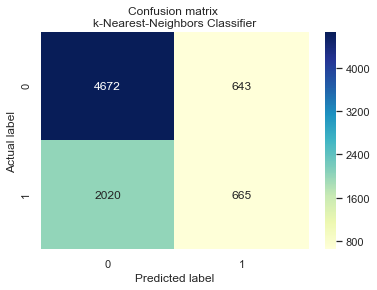

In [148]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix \nk-Nearest-Neighbors Classifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [149]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      5315
           1       0.51      0.25      0.33      2685

    accuracy                           0.67      8000
   macro avg       0.60      0.56      0.56      8000
weighted avg       0.63      0.67      0.63      8000



In [150]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

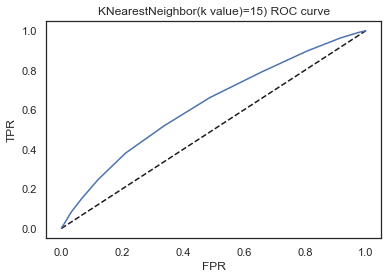

In [151]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('KNearestNeighbor(k value)=15) ROC curve')
plt.show()

In [152]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6236383447990737

In [153]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.674875
Best Parameters: {'n_neighbors': 47}
